In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/AI/euro
!ls

/content/drive/MyDrive/AI/euro
1.csv  2.csv  3.csv  4.csv  5.csv  6.csv  a.json  forecasting.ipynb
1.txt  2.txt  3.txt  4.txt  5.txt  6.txt  b.json


In [138]:
import glob
map = open('1.txt', 'r').read()
m = eval(map)

mapping = {}
for el in m:
    if el[2] == 'Уставки':
        name = el[0] + ' ' + el[1] + ' ' + col_name + ' ' + el[3] 
    else:
        name = el[0] + ' ' + el[1] + ' ' + el[2] + ' ' + el[3] 
        col_name = el[2]
    mapping[''.join([x for x in el[4] if x != '\\'])] = name

len(mapping.keys())

121

In [330]:
import json
json.dump(mapping, open('mapping.json', 'w'))

In [139]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [243]:
df = pd.read_csv('1.csv', parse_dates=['timestamp'])
df.columns= ['timestamp'] + [''.join([x for x in el if x != '\\']) for el in df.columns if el != 'timestamp']
df = df.rename(columns=mapping)
df = df.set_index('timestamp').resample('5T').first().reset_index()
df

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df.columns[70:110]

In [132]:
from datetime import datetime, timedelta

# создание списка с датами
date_list = [df['timestamp'].min() + timedelta(minutes=x) for x in range(0, 60*24*60*60, 15)]

len(date_list)

df = df[df['timestamp'].isin(date_list)]
df.shape

In [245]:
df = df.set_index('timestamp').resample('5T').first().reset_index()
df

,timestamp,Подшипник 1 Температура нагрева Температура temperature,Подшипник 1 Температура нагрева Температура alarm_max,Подшипник 1 Температура нагрева Температура alarm_min,Подшипник 1 Температура нагрева Температура warning_max,Подшипник 1 Температура нагрева Температура warning_min,Подшипник 1 Вибрация Осевая vibration_axial,Подшипник 1 Вибрация Осевая alarm_max,Подшипник 1 Вибрация Осевая alarm_min,Подшипник 1 Вибрация Осевая warning_max,...,Положение задвижки gas_valve_closed,Положение задвижки gas_valve_open,Положение задвижки gas_valve_position,Главный привод rotor_current,Главный привод rotor_voltage,Главный привод stator_current,Главный привод stator_voltage,Маслосистема oil_level,Маслосистема oil_pressure,Работа эксгаустера work
0,2023-01-25 09:30:00,62.800003,75.0,0.0,65.0,0.0,0.381944,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,180.850937,1.0,83.547989,2.156743,1.0
1,2023-01-25 09:35:00,62.800003,75.0,0.0,65.0,0.0,0.381944,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,184.624741,1.0,83.452797,2.145085,1.0
2,2023-01-25 09:40:00,62.800003,75.0,0.0,65.0,0.0,0.387731,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,179.877045,1.0,83.631989,2.151311,1.0
3,2023-01-25 09:45:00,62.800003,75.0,0.0,65.0,0.0,0.381944,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,182.871750,1.0,83.525589,2.159490,1.0
4,2023-01-25 09:50:00,62.800003,75.0,0.0,65.0,0.0,0.381944,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,180.802231,1.0,83.475189,2.153874,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6642,2023-02-17 11:00:00,61.800003,75.0,0.0,65.0,0.0,0.243056,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,184.089111,1.0,78.676224,2.147954,1.0
6643,2023-02-17 11:05:00,61.800003,75.0,0.0,65.0,0.0,0.254630,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,182.725662,1.0,78.564224,2.151006,1.0
6644,2023-02-17 11:10:00,61.800003,75.0,0.0,65.0,0.0,0.254630,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,185.817764,1.0,78.799423,2.154912,1.0
6645,2023-02-17 11:15:00,61.899994,75.0,0.0,65.0,0.0,0.254630,7.1,0.0,4.5,...,0.0,1.0,0.0,1.0,0.0,184.770828,1.0,78.357040,2.149358,1.0


In [331]:
mapping

{'SM_Exgauster[2:27]': 'Подшипник 1 Температура нагрева Температура temperature',
 'SM_Exgauster[2:65]': 'Подшипник 1 Температура нагрева Температура alarm_max',
 'SM_Exgauster[2:74]': 'Подшипник 1 Температура нагрева Температура alarm_min',
 'SM_Exgauster[2:83]': 'Подшипник 1 Температура нагрева Температура warning_max',
 'SM_Exgauster[2:92]': 'Подшипник 1 Температура нагрева Температура warning_min',
 'SM_Exgauster[2:2]': 'Подшипник 1 Вибрация Осевая vibration_axial',
 'SM_Exgauster[2:139]': 'Подшипник 1 Вибрация Осевая alarm_max',
 'SM_Exgauster[2:151]': 'Подшипник 1 Вибрация Осевая alarm_min',
 'SM_Exgauster[2:163]': 'Подшипник 1 Вибрация Осевая warning_max',
 'SM_Exgauster[2:175]': 'Подшипник 1 Вибрация Осевая warning_min',
 'SM_Exgauster[2:0]': 'Подшипник 1 Вибрация Горизонтальная vibration_horizontal',
 'SM_Exgauster[2:137]': 'Подшипник 1 Вибрация Горизонтальная alarm_max',
 'SM_Exgauster[2:149]': 'Подшипник 1 Вибрация Горизонтальная alarm_min',
 'SM_Exgauster[2:161]': 'Подшипни

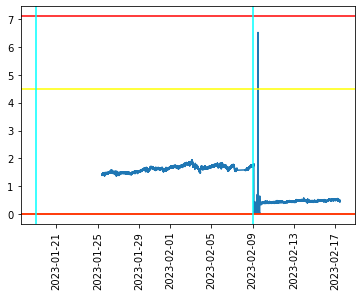

In [244]:
import datetime
from statsmodels.tsa.api import ExponentialSmoothing

plt.plot(df['timestamp'], df['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'])
plt.xticks(rotation=90)

plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная warning_min'][0], color='yellow')
plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная warning_max'][0], color='yellow')

plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная alarm_min'][0], color='red')
plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная alarm_max'][0], color='red')

red_dates = ['2023-02-09', '2023-01-19']
red_dates = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in red_dates]
for date in red_dates:
    plt.axvline(x=date, color='cyan')
plt.show()

In [150]:
df.fillna(0, inplace=True)

In [151]:
result = adfuller(df['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.967500
p-value: 0.301002
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [102]:
df_diff = df['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'].diff().dropna()

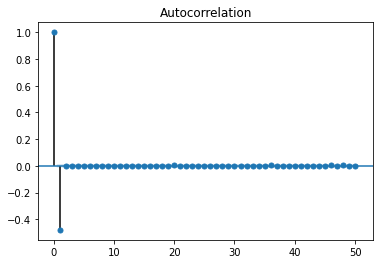

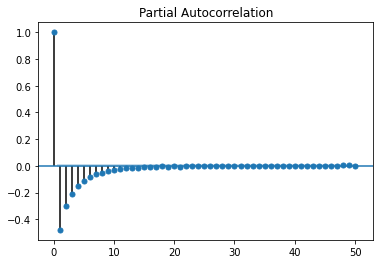

In [103]:
plot_acf(df_diff, lags=50)
plt.show()

plot_pacf(df_diff, lags=50)
plt.show()

In [ ]:
df[df['timestamp'].isin(date_list)]

In [174]:
model = ARIMA(df.set_index('timestamp').loc['2023-02-17':]['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'], order=(1, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                                                  SARIMAX Results                                                   
Dep. Variable:     Подшипник 7 Вибрация Горизонтальная vibration_horizontal   No. Observations:                  137
Model:                                                       ARIMA(1, 1, 2)   Log Likelihood                 415.379
Date:                                                      Sun, 19 Feb 2023   AIC                           -822.759
Time:                                                              03:01:13   BIC                           -811.108
Sample:                                                          02-17-2023   HQIC                          -818.024
                                                               - 02-17-2023                                         
Covariance Type:                                                        opg                                         
                 coef    std err          z      P>|z|      [0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'


In [175]:
forecast_values = model_fit.forecast(steps=240)
forecast_values

2023-02-17 11:25:00    0.461494
2023-02-17 11:30:00    0.461461
2023-02-17 11:35:00    0.461433
2023-02-17 11:40:00    0.461409
2023-02-17 11:45:00    0.461390
                         ...   
2023-02-18 07:00:00    0.461285
2023-02-18 07:05:00    0.461285
2023-02-18 07:10:00    0.461285
2023-02-18 07:15:00    0.461285
2023-02-18 07:20:00    0.461285
Freq: 5T, Name: predicted_mean, Length: 240, dtype: float64

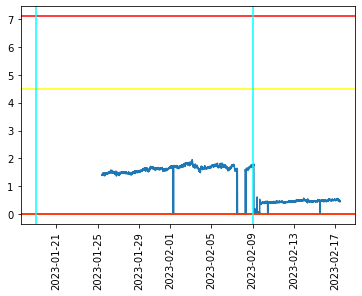

In [176]:
import datetime

plt.plot(df['timestamp'], df['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'])
plt.xticks(rotation=90)

plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная warning_min'][0], color='yellow')
plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная warning_max'][0], color='yellow')

plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная alarm_min'][0], color='red')
plt.axhline(y=df['Подшипник 7 Вибрация Горизонтальная alarm_max'][0], color='red')

red_dates = ['2023-02-09', '2023-01-19']
red_dates = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in red_dates]
for date in red_dates:
    plt.axvline(x=date, color='cyan')
plt.show()

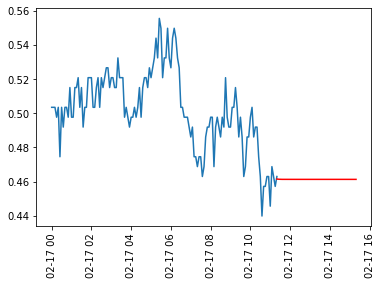

In [177]:
plt.plot(df.set_index('timestamp').loc['2023-02-17':].index, df.set_index('timestamp').loc['2023-02-17':]['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'], label='Actual')
plt.xticks(rotation=90)

plt.plot(date_list, forecast_values.values, color='red', label='Predicted')

In [178]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
!pip install catboost -qqq
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import StratifiedKFold, StratifiedGroupKFold
from copy import deepcopy 
import pickle
import sklearn.metrics

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.0 MB/s eta 0:00:00


In [179]:
def set_seed(seed: int):
    """Set a random seed for complete reproducibility."""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(0xBACED)

In [250]:
df = df.set_index('timestamp')

In [229]:
X = df.loc['2023-02-01':]['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'].values
X

array([1.66087973, 1.67245376, 1.67245376, ..., 0.46296296, 0.45717594,
       0.46296296])

In [237]:
np.array(data).shape

(300, 100)

In [239]:
preds = df['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'].loc['2023-02-17':].values[-100:].tolist()
for i in range(300):
    pred = model.predict(preds[-100:])
    preds.append(pred)

In [240]:
deltas = [df.index.max() + timedelta(minutes=x) for x in range(300)]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor

df = pd.read_csv('1.csv', parse_dates=['timestamp'])
df.columns= ['timestamp'] + [''.join([x for x in el if x != '\\']) for el in df.columns if el != 'timestamp']
df = df.rename(columns=mapping)
df = df.set_index('timestamp').resample('5T').first().reset_index()

lim = {}
for col in tqdm(df.columns):
    if 'Подшипник' in col and ('max' not in col and 'min' not in col):
        print(col)
        col_name = col
        data, target = [], []

        X = df[col_name].values

        tscv = TimeSeriesSplit(n_splits=300, test_size=1)
        for i, (train_index, test_index) in enumerate(tscv.split(X)):
            data.append(X[train_index[-100:]])
            target.append(X[test_index[0]])
        data = np.array(data)
        target = np.array(target)
        # print(data, target)

        model = CatBoostRegressor()
        model.fit(data, target)
        model.save_model(os.path.join('models/', col_name + '.cb'))

        prefix = ' '.join(col_name.split()[:-1])
        alarm_max = df[prefix + ' alarm_max'][0]
        alarm_min = df[prefix + ' alarm_min'][0]

        warning_max = df[prefix + ' warning_max'][0]
        warning_min = df[prefix + ' warning_min'][0]

        lim[col_name] = {'alarm_max': alarm_max, 'alarm_min': alarm_min,
                                 'warning_max': warning_max, 'warning_min': warning_min}

In [298]:
!ls models

'Подшипник 1 Вибрация Вертикальная vibration_vertical.cb'
'Подшипник 1 Вибрация Горизонтальная vibration_horizontal.cb'
'Подшипник 1 Вибрация Осевая vibration_axial.cb'
'Подшипник 1 Температура нагрева Температура temperature.cb'
'Подшипник 2 Вибрация Вертикальная vibration_vertical.cb'
'Подшипник 2 Вибрация Горизонтальная vibration_horizontal.cb'
'Подшипник 2 Вибрация Осевая vibration_axial.cb'
'Подшипник 2 Температура нагрева Температура temperature.cb'
'Подшипник 3 Температура нагрева Температура temperature.cb'
'Подшипник 4 Температура нагрева Температура temperature.cb'
'Подшипник 5 Температура нагрева Температура temperature.cb'
'Подшипник 6 Температура нагрева Температура temperature.cb'
'Подшипник 7 Вибрация Вертикальная vibration_vertical.cb'
'Подшипник 7 Вибрация Горизонтальная vibration_horizontal.cb'
'Подшипник 7 Вибрация Осевая vibration_axial.cb'
'Подшипник 7 Температура нагрева Температура temperature.cb'
'Подшипник 8 Вибрация Вертикальная vibration_vertical.cb'
'Подшипн

In [299]:
lim[col_name]

{'alarm_max': 75.0, 'alarm_min': 0.0, 'warning_max': 65.0, 'warning_min': 0.0}

In [304]:
import pickle
with open('lim_mapping.pkl', 'wb') as f:
    pickle.dump(lim, f)

In [303]:
import glob
import catboost as cb
import pandas as pd
import numpy as np
import pickle

with open('lim_mapping.pkl', 'rb') as f:
    lim = pickle.load(f)

models = glob.glob('models/*.cb')

min_is_crashed = 1e9
min_is_warning = 1e9
for model_path in models:
    model = cb.CatBoostRegressor()
    model.load_model(model_path)

    col_name = model_path.split('/')[-1].split('.')[0]

    preds = df[col_name].values[-100:].tolist()
    for i in range(300):
        pred = model.predict(preds[-100:])
        preds.append(pred)

    preds = np.array(preds[100:])
    alarm_max, alarm_min, warning_max, warning_min = lim[col_name].values()
    is_crashed = -1
    is_warning = -1
    for i in range(len(preds)):
        if preds[i] > alarm_max or preds[i] < alarm_min:
            is_crashed = i
            break
        elif preds[i] > warning_max or preds[i] < warning_min:
            is_warning = i

    if is_crashed != -1:
        min_is_crashed = min(min_is_crashed, (is_crashed * 5) // 60 + 1)
    elif is_warning != -1:
        min_is_warning = min(min_is_warning, (is_crashed * 5) // 60 + 1)

empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1
empty -1


In [287]:
lim

{'Подшипник 1 Температура нагрева Температура temperature.cb': {'alarm_max': 75.0,
  'alarm_min': 0.0,
  'warning_max': 65.0,
  'warning_min': 0.0}}

In [ ]:
preds = df[col_name].values[-100:].tolist()

In [277]:
df.columns[:50]

Index(['Подшипник 1 Температура нагрева Температура temperature',
       'Подшипник 1 Температура нагрева Температура alarm_max',
       'Подшипник 1 Температура нагрева Температура alarm_min',
       'Подшипник 1 Температура нагрева Температура warning_max',
       'Подшипник 1 Температура нагрева Температура warning_min',
       'Подшипник 1 Вибрация Осевая vibration_axial',
       'Подшипник 1 Вибрация Осевая alarm_max',
       'Подшипник 1 Вибрация Осевая alarm_min',
       'Подшипник 1 Вибрация Осевая warning_max',
       'Подшипник 1 Вибрация Осевая warning_min',
       'Подшипник 1 Вибрация Горизонтальная vibration_horizontal',
       'Подшипник 1 Вибрация Горизонтальная alarm_max',
       'Подшипник 1 Вибрация Горизонтальная alarm_min',
       'Подшипник 1 Вибрация Горизонтальная warning_max',
       'Подшипник 1 Вибрация Горизонтальная warning_min',
       'Подшипник 1 Вибрация Вертикальная vibration_vertical',
       'Подшипник 1 Вибрация Вертикальная alarm_max',
       'Подш

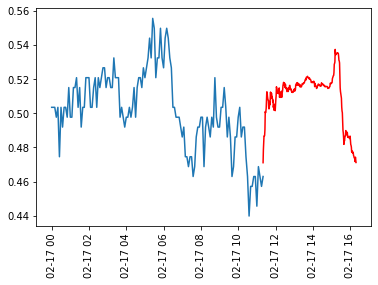

In [241]:
 plt.plot(df.loc['2023-02-17':].index, df.loc['2023-02-17':]['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'], label='Actual')
plt.xticks(rotation=90)

plt.plot(deltas, preds[100:], color='red', label='Predicted')

In [247]:
X_col = 'Подшипник 7 Вибрация Горизонтальная vibration_horizontal'

In [270]:
from statsmodels.tsa.api import ExponentialSmoothing


model = ExponentialSmoothing(df.loc['2023-02-17':]['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'], trend='additive', seasonal='additive', seasonal_periods=30)

# обучение модели
model_fit = model.fit()

# предсказание будущих значений
predictions = model_fit.forecast(30)

In [271]:
df.index.max() 

Timestamp('2023-02-17 11:20:00')

In [260]:
from datetime import Timestamp

ImportError: ignored

In [272]:
deltas = [df.index.max() + timedelta(minutes=x) for x in range(30)]

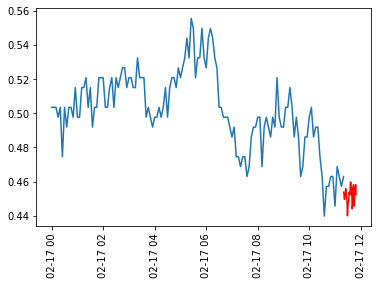

In [274]:
plt.plot(df.loc['2023-02-17':].index, df.loc['2023-02-17':]['Подшипник 7 Вибрация Горизонтальная vibration_horizontal'], label='Actual')
plt.xticks(rotation=90)

plt.plot(deltas, predictions, color='red', label='Predicted')

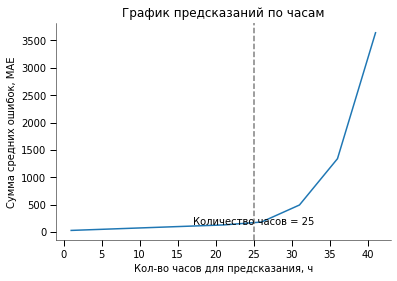

In [329]:
import matplotlib.pyplot as plt


def elbow_function(x):
    if x >= 25:
        return np.exp(x/5)  # экспоненциальный рост
    else:
        return 5*(x-25) + np.exp(5) 

# данные для графика
x = np.arange(1, 45, 5)

# Вычисляем y = e^x для каждого значения x
y = [elbow_function(i) for i in x]


# создание графика
fig, ax = plt.subplots()
ax.plot(x, y)

# задание заголовка и меток осей
ax.set_title('График предсказаний по часам')
ax.set_xlabel('Кол-во часов для предсказания, ч')
ax.set_ylabel('Сумма средних ошибок, MAE')

# настройка внешнего вида графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(axis='both', length=6, width=1)

# добавление вертикальной линии на график
plt.axvline(x=25, color='grey', linestyle='--')

# добавление подписи к линии
plt.text(17, 125, 'Количество часов = 25')

# отображение графика
plt.show()